Before Executing this code, prerequisite standard format for CSV as shown in image below

![](./image_show/csv_format.png)

Image folder structure

![](./image_show/tree.png)

Note: Interactive confusion matrix id only programmed to work with two classes only!

## Import Libraries

In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact,AppLayout,VBox,ToggleButtons,link,interactive,IntSlider,GridspecLayout, Button, Layout,Box,Label
import ipywidgets
from sklearn import datasets
import os
import copy
import imutils
import numpy as np
import joblib
#from math import sqrt
import functools
import math
from sklearn.metrics import confusion_matrix
import ipyplot
from sklearn import*
from unipath import Path
from tqdm import tqdm
import sys
import shutil
import time
import pathlib
import seaborn as sns
import ipywidgets as widgets
from IPython.display import clear_output, Image


In [2]:
#Load csv to panda df
df = pd.read_csv('./resultstranferlearning.csv')
#set default values and directory to load
folder='./catsndog/test'

## Screen Dataframe using sliders

In [3]:
#find max class 
max_pred_num = df['Classification'].max()

# GUI to visualize df using sliders
# Screen pandas using input from ipywidgets
def inter_confusion_matrix(Class, predicted_as):
    global sdf
    sdf = df.loc[(df['Predictions'] == predicted_as) & (df['Classification'] == Class)]
    #Display all rows and column from sdf
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(sdf.info())
        print (sdf)
        
    return sdf

int_slider= interactive(inter_confusion_matrix, Class=(0, max_pred_num) , predicted_as = (0, max_pred_num));

In [4]:
int_slider

interactive(children=(IntSlider(value=0, description='Class', max=1), IntSlider(value=0, description='predicte…

In [5]:
sdf

,Filename,Predictions,Classification,Cats,Dogs
0,Cats\1101.jpg,0,0,0.528136,0.471864
3,Cats\1104.jpg,0,0,0.615862,0.384138
5,Cats\1106.jpg,0,0,0.603891,0.396109
6,Cats\1107.jpg,0,0,0.870301,0.129699
7,Cats\1108.jpg,0,0,0.838461,0.161539
...,...,...,...,...,...
92,Cats\1193.jpg,0,0,0.655903,0.344097
96,Cats\1197.jpg,0,0,0.781381,0.218619
97,Cats\1198.jpg,0,0,0.877201,0.122799
98,Cats\1199.jpg,0,0,0.523479,0.476521


### Interact with Classification Threshold

In [6]:
# list(data) or
column_name = list(df.columns)

In [7]:
column_name

['Filename', 'Predictions', 'Classification', 'Cats', 'Dogs']

In [8]:
intrctive_thrs_df = []
def thres_cm(Threshold_value):
    global intrctive_thrs_df
    lo=df.Cats <= Threshold_value
    do=df['Classification']>=0.50
    
    intrctive_thrs_df = df.assign(Predictions=1*lo)
    shape_confusion_tes = confusion_matrix(do,lo)
    #Beautify Confusion Matrix
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    group_names  = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    shape_confusion_tes.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         shape_confusion_tes.flatten()/np.sum(shape_confusion_tes)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names ,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    g = sns.heatmap(shape_confusion_tes, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #to be improved#####
    g.set(xticklabels=[column_name[3],column_name[4]])
    g.set(yticklabels=[column_name[3],column_name[4]])
    return

In [9]:
thre_slider= interactive(thres_cm, Threshold_value=(0, 1.000, 0.01));
thre_slider

interactive(children=(FloatSlider(value=0.5, description='Threshold_value', max=1.0, step=0.01), Output()), _d…

In [25]:
intrctive_thrs_df['Predictions'].value_counts()

1    186
0     14
Name: Predictions, dtype: int64

In [26]:
intrctive_thrs_df

,Filename,Predictions,Classification,Cats,Dogs
0,Cats\1101.jpg,1,0,0.528136,0.471864
1,Cats\1102.jpg,1,0,0.461086,0.538914
2,Cats\1103.jpg,1,0,0.226871,0.773129
3,Cats\1104.jpg,1,0,0.615862,0.384138
4,Cats\1105.jpg,1,0,0.414219,0.585781
...,...,...,...,...,...
195,Dogs\1196.jpg,1,1,0.563716,0.436284
196,Dogs\1197.jpg,1,1,0.226871,0.773129
197,Dogs\1198.jpg,1,1,0.231414,0.768586
198,Dogs\1199.jpg,1,1,0.577412,0.422588


### View Images Within range

In [27]:
# Image loader ofter button handle event
images = []
def load_images_from_folder(folder, range_filename):
    global images
    count = 0
    path_dir = [] #path directory
    images = [] #clean images list
    for i in range_filename:
        #open CV Load image a BGR as default
        img = cv2.imread(os.path.join(folder,i))
        #convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        #print(folder)
        if img is not None:
            images.append(img)
            path_dir.append(os.path.join(folder,i))
            count+=1
    return images,int(count), path_dir
#load_images_from_folder(folder, range_filename)

counter=0
max_num_img= 50
def range_sample_display(range_list_image, range_filename):
    print("Max Image Displayed:",max_num_img)
    index_display =range_list_image[counter:counter+max_num_img] #[start:end]
    index_label = range_filename[counter:counter+max_num_img]  
    #execute if list not empty!
    if index_display:
        display(ipyplot.plot_images(index_display,labels=index_label,img_width=200))

    return 


In [28]:
range_finder=widgets.FloatRangeSlider(
    value=[0.4, 0.6],
    min=0,
    max=1.0,
    step=0.01,
    description='Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    )


In [29]:

def Within_range(up_n_low_limit):
    print(up_n_low_limit)
    #get lower limit
    threshold_lower_lim=up_n_low_limit[0]
    #get uper limit
    threshold_upper_lim=up_n_low_limit[1]
    range_df=df['Cats'].between(threshold_lower_lim, threshold_upper_lim, inclusive=True)
    range_filename=df.Filename[range_df].tolist()
    #Load image in list
    range_list_image,count, path_dir = load_images_from_folder(folder, range_filename)
    print('count of images:',count)
    range_sample_display(range_list_image, range_filename)
    
    return

Visualize images within range (mostly meant to visulaize images which lies on border line)

In [30]:
interact(Within_range,up_n_low_limit=range_finder);

interactive(children=(FloatRangeSlider(value=(0.4, 0.6), continuous_update=False, description='Range:', max=1.…

## Visualize Confusion Matrix Images

In [31]:
# to be removed once intergrated with transferlearninf program
#confusion_matrix??
# used to define shape of matrix only
# y_true = [1, 1, 1, 1, 0, 0]
# y_pred = [1, 0, 1, 1, 0, 0]
y_true = df.Classification
y_pred = df.Predictions
y_true.tolist()
y_pred.tolist()
shape_confusion = confusion_matrix(y_true,y_pred)

In [34]:
### initilize grid button and display image

#initialize df and set default filtering to start with
sdf = intrctive_thrs_df.loc[(intrctive_thrs_df['Predictions'] == 0) & (intrctive_thrs_df['Classification'] == 0)]
sdf= sdf.reset_index()

#List of options in dropdown menu for data cleaner / Also used for grid naming
class_dict_raw = [("Not_sure", -1),(column_name[3], 0), (column_name[4], 1)]  #used for dropdown list and description in matrix
class_dict = dict(class_dict_raw) # dictionary
class_dict= {v: k for k, v in class_dict.items()}  #invert dictionary

# Image loader ofter button handle event
images = []
def load_images_from_folder(folder, file_name):
    global images
    images = [] #clean images list
    for filename in file_name:
        img = cv2.imread(os.path.join(folder,filename))
        #convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #print(folder)
        if img is not None:
            images.append(img)
    return images

#generate description for button
def button_description(a,b):
    global desc_name
    global class_dict
    #num_text_desc = a*b
    for i in range(a):
        for j in range(b):
            #print(i,j)
            desc_name.append('\''+class_dict[i]+'\''+" predicted as "+'\''+class_dict[j]+'\'')
    return np.reshape(desc_name,(-1,int(math.sqrt(len(desc_name))))) #covert list to numpy matrix

def handle_grid_button_change(b):
    global sdf
    global file_name
    #find index where name match. later used for screening
    x = np.where(grid_name == b.description)
    sdf = intrctive_thrs_df.loc[(intrctive_thrs_df['Predictions'] == x[1][0]) & (intrctive_thrs_df['Classification'] == x[0][0])]
    #print(sdf)
    sdf= sdf.reset_index()
    file_name = sdf['Filename']
    load_images_from_folder(folder,file_name)
    display(scroll_images)
    return sdf

#initilise grid variable and layout
desc_name= []
grid = GridspecLayout(shape_confusion.shape[0],shape_confusion.shape[1])
grid_name= button_description(shape_confusion.shape[0],shape_confusion.shape[1]) 


# Create button layout to display as a matrix
for i in range(shape_confusion.shape[0]):
    for j in range(shape_confusion.shape[1]):
        grid[i, j] = Button(description= grid_name[i, j],button_style='success',layout= Layout(width= '98%', height= '80px',align_items='stretch'))

# On Grid button click, Handle event
for i in range(grid.n_rows):
    for j in range(grid.n_columns):
        grid[i, j].on_click(handle_grid_button_change);


#Initialize Button Widgets
scroll_images = widgets.Button(
    description='Show Images/Next Page',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Show set of images',
    icon='',
    width='auto' #doesnt work
    )

reset_images = widgets.Button(
    description='Reset image counter',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon=''
    )

counter= 0
max_num_img= 10

def scroll_img(b):
    global counter
    clear_output(True)
    labelipy = file_name.tolist()
    try:      
        index_display =images[counter:counter+max_num_img]
        index_label = labelipy[counter:counter+max_num_img]
        ipyplot.plot_images(index_display,labels=index_label,img_width=200)
        display(scroll_images,reset_images)
        print('Total Image =',len(images))
        print(counter)
    except:
        #clear_output(True)
        print('Image not found or end of list')
        display(reset_images)
        
    counter +=max_num_img

def reset_counter(b):
    global counter
    counter= 0
    return
scroll_images.on_click(scroll_img)
reset_images.on_click(reset_counter)

C:\Users\MARVIN\anaconda3\envs\tensorflow15\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



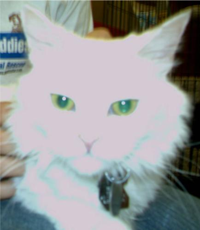
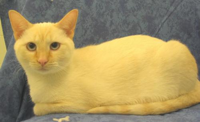
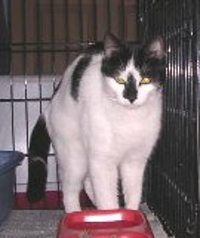
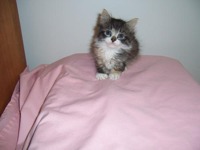
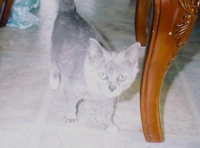
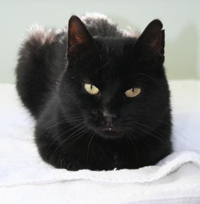
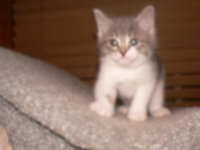
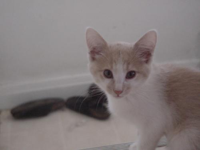
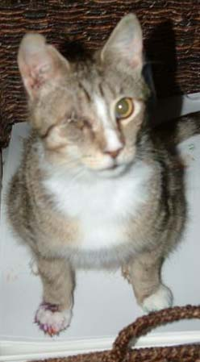
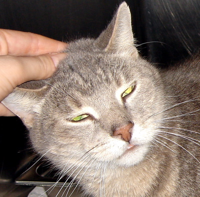


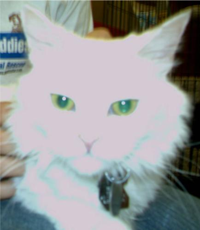
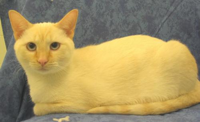
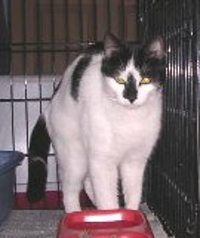
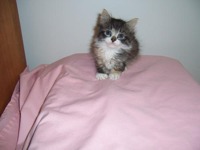
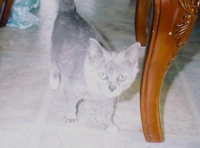
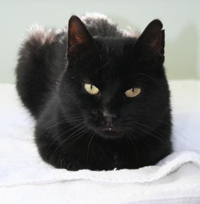
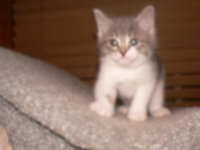
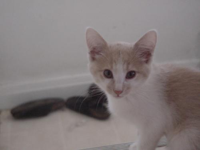
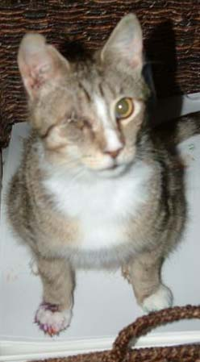
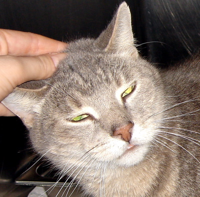

Button(button_style='info', description='Show Images/Next Page', style=ButtonStyle(), tooltip='Show set of ima…

Button(button_style='info', description='Reset image counter', style=ButtonStyle(), tooltip='Click me')

Total Image = 13
0


In [35]:
grid

## Image Cleaner

In [21]:
####Visualize image for data cleaner
# To do
# add enter value box to jump to specefic image using ipywidgets
file_name = []
def view_image(i):
    global sdf 
    global file_name
    global class_dict
    file_name = sdf['Filename']
    imges= load_images_from_folder(folder,file_name)
    ####added here
    if sdf.empty:
        print('DataFrame is empty!')
        plt.close()
    if not sdf.empty:
        #print(len(imges))
        if not imges:
            print('No images found to display')
            plt.close()
        if imges:
            #print(len(imges))
            plt.imshow(imges[i], cmap=plt.cm.gray_r, interpolation='nearest')
            #plt.title('Image: %s' %file_name[i])
            print('            Image: %s' %file_name[i])
            plt.show()
            display(itemsi[i])
    return

#Initialize Dropdown Widget

#Define Layout
dropdown_layout = Layout(height='40px', min_width='300px',
                          max_width='200px',
                          justify_content='center',
                          align_content='center',
                          align_items='center'
                         )
#Map value with classification column
itemsi=[widgets.Dropdown(
                        options=class_dict_raw,
                        value= int(sdf.at[w, 'Classification']),
                        description='categorized as:', 
                        disabled=False, 
                        layout= dropdown_layout) for w in range(len(sdf['Classification']))]

viz = interactive(view_image, i=IntSlider(min=0, max=max(0, len(sdf)-1)), step=1, value=0);

In [22]:
viz

interactive(children=(IntSlider(value=0, description='i', max=64), Output()), _dom_classes=('widget-interact',…

###  Once sorted manually, move images into seperate folder

In [23]:
Move_Images = widgets.Button(
    description='Move Images',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Move images into different folder',
    icon=''
    )

result =[]
def move_images_function(b):
    newcleaneddf = []
    global result
    for i in range(len(itemsi)):     
        #print(itemsi[i].value)
        newcleaneddf.append(itemsi[i].value)
        Cleaned_list = np.array(newcleaneddf)
        Cleaned_list = pd.DataFrame(Cleaned_list, columns = ['Cleaned_list'])

        result = pd.concat([sdf, Cleaned_list], axis=1)
    #print(result) # for debugging purpose
    
    mask = result['Classification'] == result['Cleaned_list'] #compare cleaned list with classification,later used to copy images to folders
    mask = list(mask)
    
    print('\n', mask.count(False),"images will be moved")
    with tqdm(total=mask.count(False), file=sys.stdout) as pbar: 
        for i in range(len(mask)):
            path_to_create = Path('.\\directory\\'+class_dict[result.iat[i,6]]+'\\'+str(result.iat[i,1]))
            pathlib.Path(path_to_create.parent).mkdir(parents=True, exist_ok=True)  #create path/folder if doesnt exists
            if not mask[i]:
                pbar.update(1)
                time.sleep(0.2)
                newPath = shutil.copy('.\\Defects\\test\\'+str(result.iat[i,1]), '.\\directory\\'+class_dict[result.iat[i,6]]+'\\'+str(result.iat[i,1]))
            else:
                pass
    print('\nDone!')
   
    return newcleaneddf
Move_Images.on_click(move_images_function)

In [24]:
Move_Images

Button(button_style='info', description='Move Images', style=ButtonStyle(), tooltip='Move images into differen…

can use self. to create multiple button with same style

Done!